# Auto Encoders for Image Compression


#  128X128X3 Image Compression Steps:




Step-1: Imports

Step-2: Load Dataset

Step-3: Prepare Data

Step-4: Build AutoEncoder Model

Step-5: Train AutoEncoder

Step-6: Save AutoEncoder

Step-7: Load AutoEncoder Model

Step-8: Decode Function

Step-9: Visualize Results

Step-10: Compare byte sizes (Compression Ratio)

# Colour 128x128x3 Image Compression

## imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
import os
import numpy as np
import cv2

## Load Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
X=[]
for img in os.listdir('Dataset'):
    img = os.path.join('Dataset',img)
    img_arr=cv2.imread(img)
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    img_arr=cv2.resize(img_arr,(128,128))
    # plt.imshow(img_arr)
    X.append(img_arr)

X=np.array(X)
X.shape
# center images
X = X.astype('float32') / 255.0

IMG_SHAPE = X.shape[1:]
print(IMG_SHAPE)
# split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)
X_train.shape

(128, 128, 3)


(2328, 128, 128, 3)

In [5]:
X_test.shape

(259, 128, 128, 3)

## Create Convolutional AutoEncoder Model

In [6]:
class ConvAutoEncoder(Model):
  def __init__(self):
    super(ConvAutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(128, 128, 3)), 
      layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = ConvAutoEncoder()

In [7]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         2312      
                                                                 
Total params: 3,208
Trainable params: 3,208
Non-trainable params: 0
_________________________________________________________________


In [51]:
autoencoder.decoder.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

# Train AutoEncoder Model


In [9]:
autoencoder.fit(X_train, X_train,
                epochs=25,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/25
73/73 [==============================] - 65s 857ms/step - loss: 0.0692 - val_loss: 0.0207
Epoch 2/25
73/73 [==============================] - 76s 1s/step - loss: 0.0143 - val_loss: 0.0111
Epoch 3/25
73/73 [==============================] - 73s 998ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 4/25
73/73 [==============================] - 72s 988ms/step - loss: 0.0091 - val_loss: 0.0096
Epoch 5/25
73/73 [==============================] - 65s 887ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 6/25
73/73 [==============================] - 67s 916ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 7/25
73/73 [==============================] - 75s 1s/step - loss: 0.0077 - val_loss: 0.0078
Epoch 8/25
73/73 [==============================] - 83s 1s/step - loss: 0.0075 - val_loss: 0.0077
Epoch 9/25
73/73 [==============================] - 70s 952ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 10/25
73/73 [==============================] - 66s 906ms/step - loss: 0.0067 - val_loss: 0.006

## Test AutoEncoderModel

In [10]:
encoded_imgs = autoencoder.encoder(X_test[:]).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

## Visualize Results

# Train Data

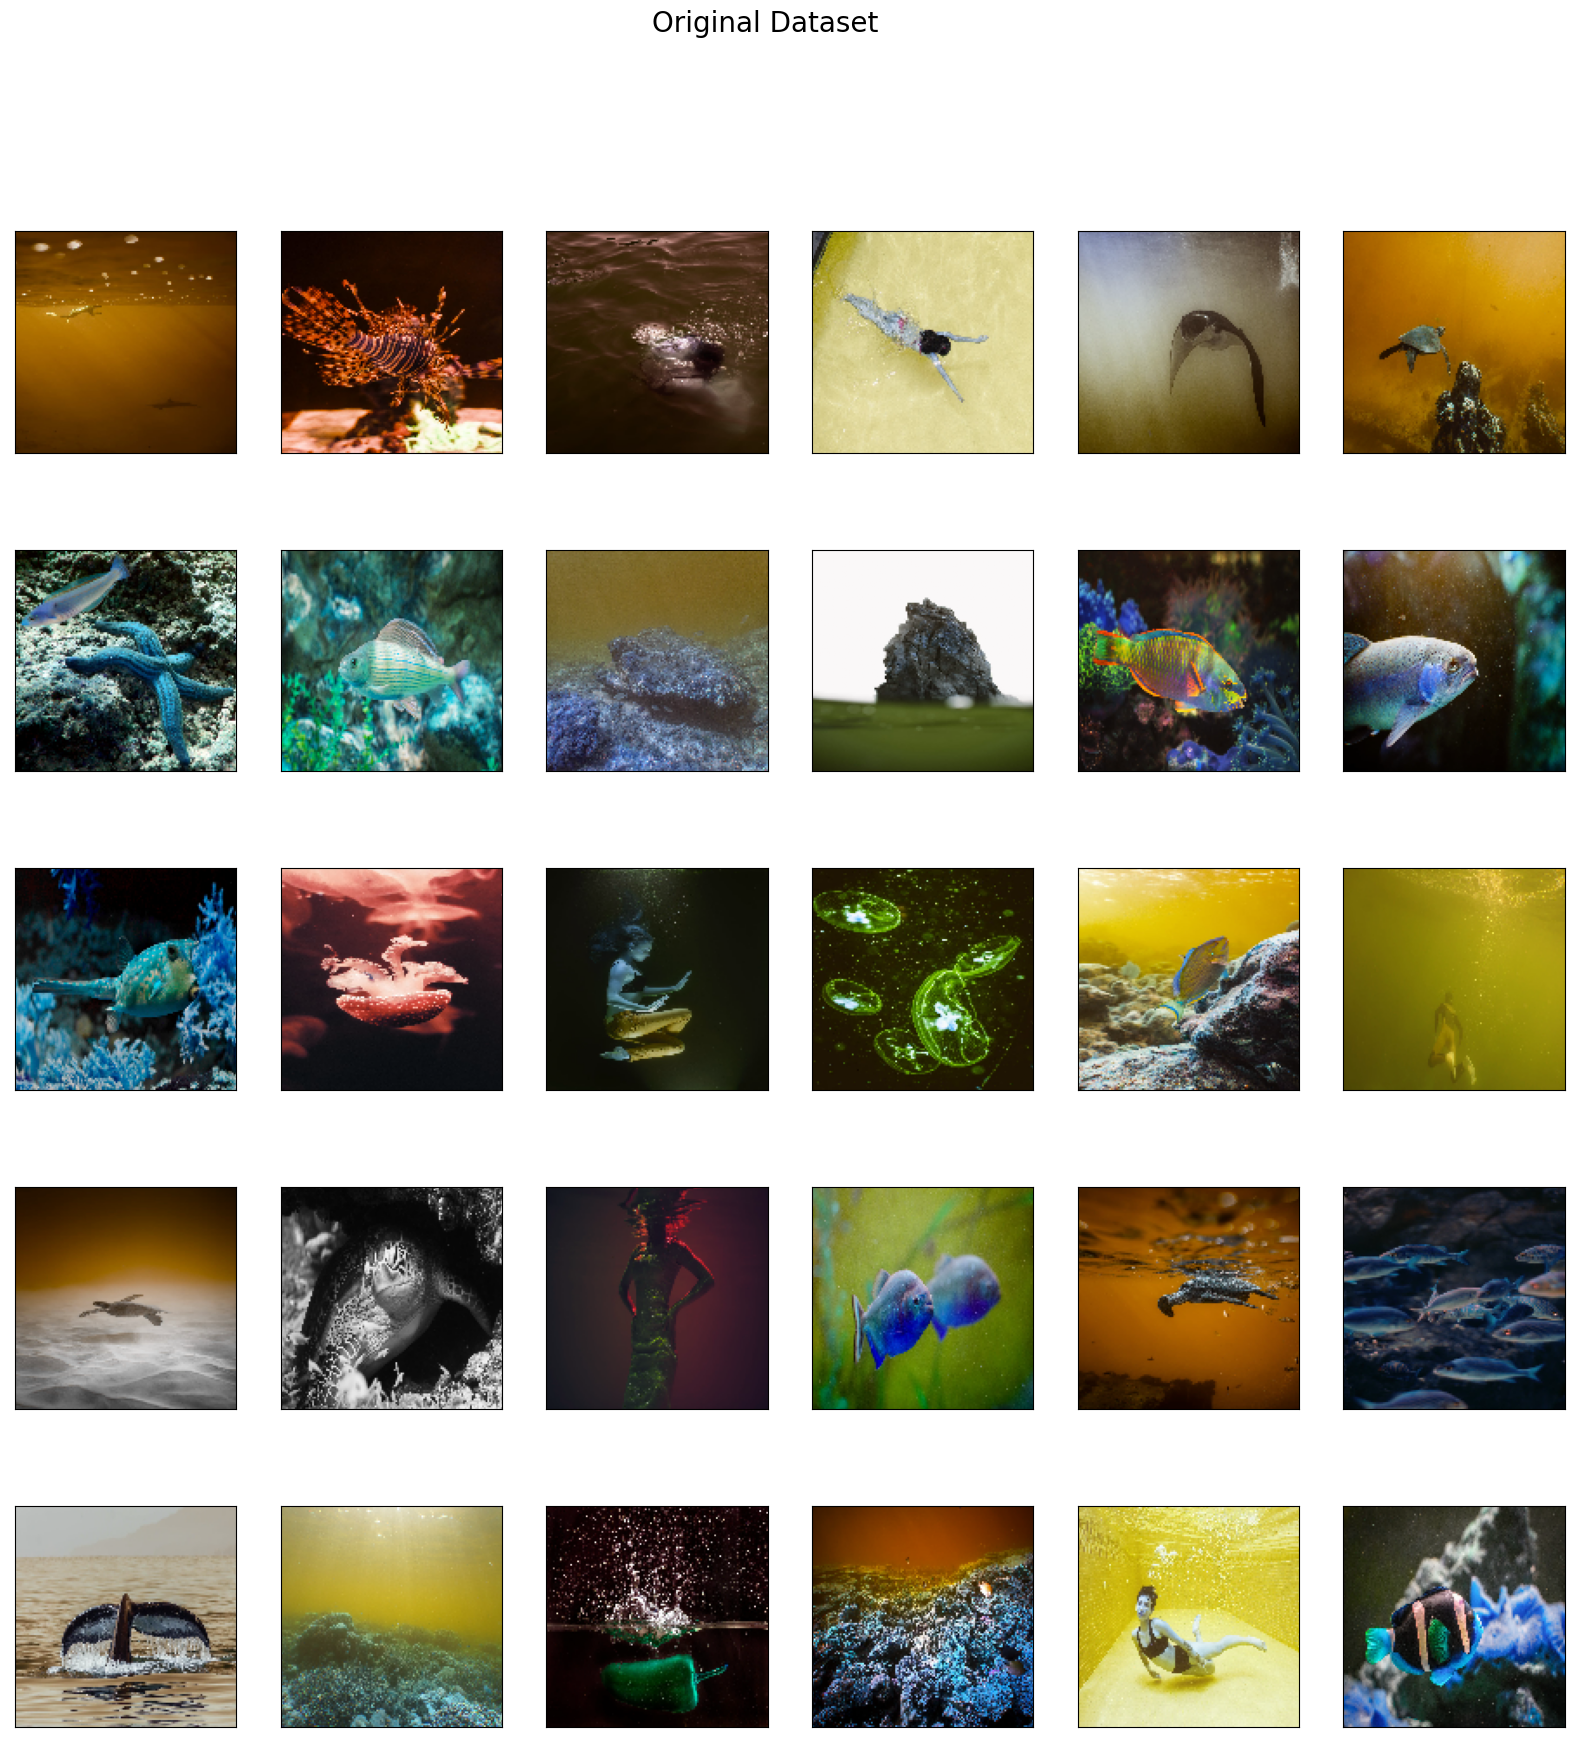

In [11]:
plt.figure(figsize=(20,20))
for i, img in enumerate(X_train[0:30]):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Original Dataset", fontsize=20)
plt.show()

# Test Data

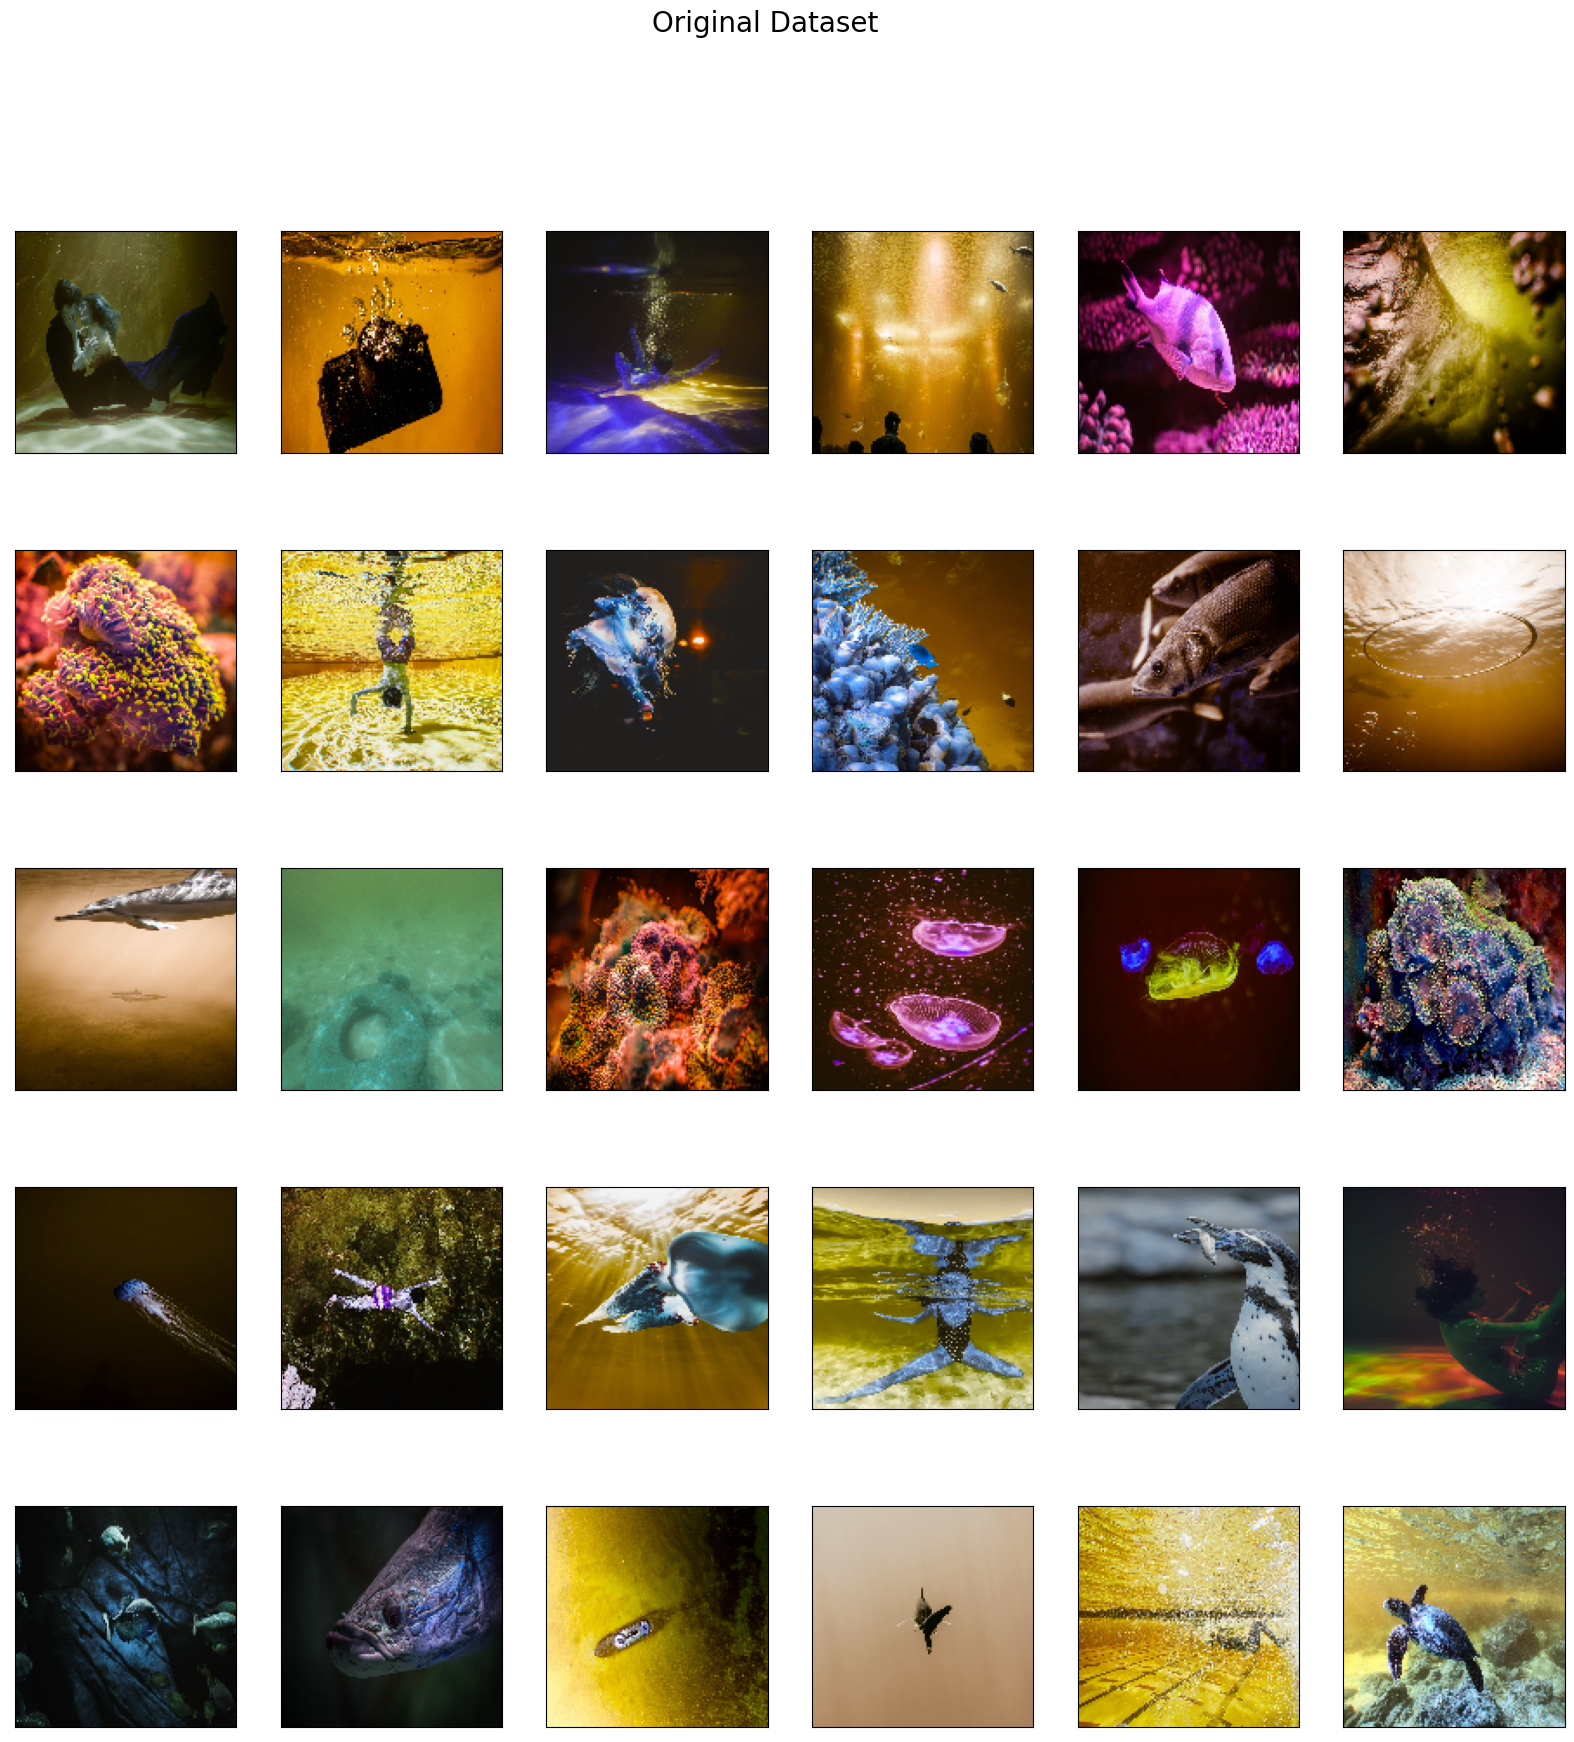

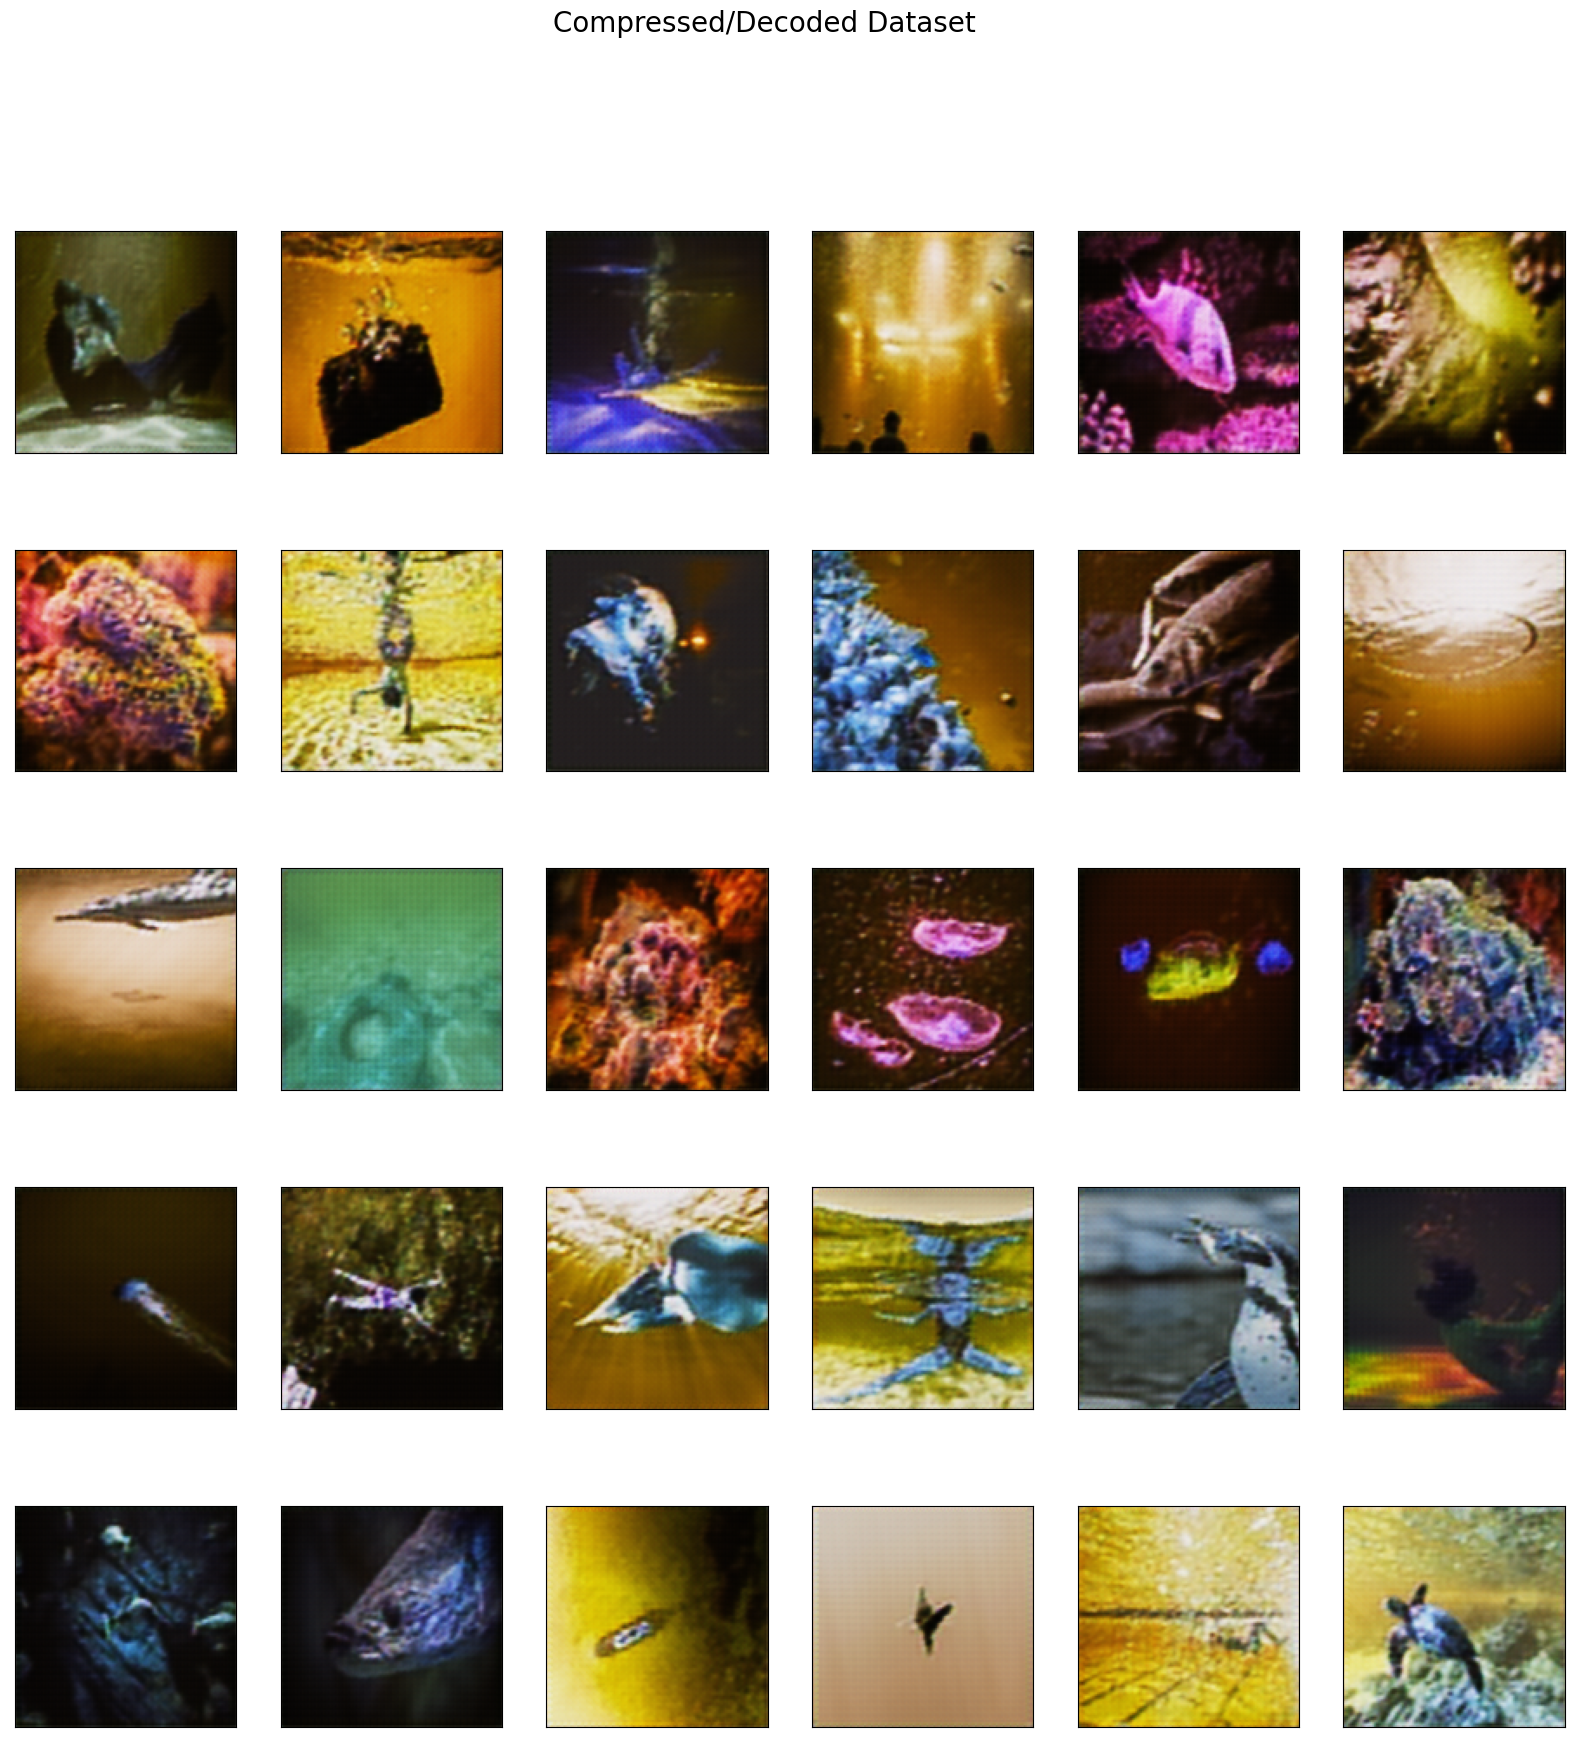

In [12]:
plt.figure(figsize=(20,20))
for i, img in enumerate(X_test[0:30]):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Original Dataset", fontsize=20)
plt.show()

plt.figure(figsize=(20,20))
for i, img in enumerate(decoded_imgs[0:30]):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Compressed/Decoded Dataset", fontsize=20)
plt.show()

## Compare Sizes (Compression Ratio)

In [13]:
X_test[:].nbytes/encoded_imgs.nbytes

6.0

### Compression Ratio of 10 Images

In [20]:


for i in range(0, 10):
    cr = X_test[i].nbytes/encoded_imgs[i].nbytes
    print(f"Compression ratio of image  { i } is {cr}")
 

Compression ratio of image  0 is 6.0
Compression ratio of image  1 is 6.0
Compression ratio of image  2 is 6.0
Compression ratio of image  3 is 6.0
Compression ratio of image  4 is 6.0
Compression ratio of image  5 is 6.0
Compression ratio of image  6 is 6.0
Compression ratio of image  7 is 6.0
Compression ratio of image  8 is 6.0
Compression ratio of image  9 is 6.0


### Peak Signal-to-Noise Ratio (PSNR)

In [36]:
from math import log10, sqrt
import cv2
  
# def PSNR(original, compressed):
#     mse = np.mean((original - compressed) ** 2)
#     if(mse == 0):  # MSE is zero means no noise is present in the signal .
#                   # Therefore PSNR have no importance.
#         return 100
#     max_pixel = 255.0
#     psnr = 20 * log10(max_pixel / sqrt(mse))
#     return psnr
  
# def main():
#      original = cv2.imread("original_image.png")
#      compressed = cv2.imread("compressed_image.png", 1)
#      value = PSNR(original, compressed)
#      print(f"PSNR value is {value} dB")
       
# if __name__ == "__main__":
#     main()


for i in range(0, len(X_test)):
    mse = np.mean((X_test[i] - decoded_imgs[i]) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
        print("PSNR has no importance")          # Therefore PSNR have no importance.
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    cr = X_test[i].nbytes/encoded_imgs[i].nbytes
    print(f"CR, MSE and PSNR of Test image  { i } is {cr}, {mse}, {psnr}")
 

CR, MSE and PSNR of Test image  0 is 6.0, 0.0011574148666113615, 77.49591304435498
CR, MSE and PSNR of Test image  1 is 6.0, 0.006046531721949577, 70.31574025211891
CR, MSE and PSNR of Test image  2 is 6.0, 0.0020036969799548388, 75.11248317267503
CR, MSE and PSNR of Test image  3 is 6.0, 0.0017422122182324529, 75.71979305722225
CR, MSE and PSNR of Test image  4 is 6.0, 0.005437374114990234, 70.7769114548875
CR, MSE and PSNR of Test image  5 is 6.0, 0.004289225209504366, 71.80701511020247
CR, MSE and PSNR of Test image  6 is 6.0, 0.012967119924724102, 67.00236833488124
CR, MSE and PSNR of Test image  7 is 6.0, 0.017304668202996254, 65.74917084252458
CR, MSE and PSNR of Test image  8 is 6.0, 0.0030722711235284805, 73.2562082195093
CR, MSE and PSNR of Test image  9 is 6.0, 0.008334306068718433, 68.92210915440829
CR, MSE and PSNR of Test image  10 is 6.0, 0.0026948789600282907, 73.82541097160478
CR, MSE and PSNR of Test image  11 is 6.0, 0.0027822961565107107, 73.68677005056304
CR, MSE an

# Save and Load AutoEncoder Model

In [24]:
autoencoder.save("./autoencoder_model_128x128x3")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./autoencoder_model_128x128_gray/assets


# Load Pretrained Model and Run Inference

In [26]:
autoencoder = tf.keras.models.load_model('./autoencoder_model_128x128x3/')
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 8)         80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 4)         292       
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 4)         148       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 8)       296       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 1)       73        
Total params: 517
Trainable params